In [4]:
import yfinance as yf
import yahoo_fin.stock_info as si 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from datetime import datetime

In [7]:
stock = 'AAPL'
aapl = yf.Ticker(stock)

In [11]:
aapl.basic_info['dayHigh']

193.5

In [14]:
aapl.get_financials().dropna()

,2023-09-30,2022-09-30,2021-09-30,2020-09-30
TaxEffectOfUnusualItems,0.0,0.0,0.0,0.0
TaxRateForCalcs,0.147192,0.162045,0.133023,0.144282
NormalizedEBITDA,125820000000.0,130541000000.0,120233000000.0,77344000000.0
NetIncomeFromContinuingOperationNetMinorityInterest,96995000000.0,99803000000.0,94680000000.0,57411000000.0
ReconciledDepreciation,11519000000.0,11104000000.0,11284000000.0,11056000000.0
ReconciledCostOfRevenue,214137000000.0,223546000000.0,212981000000.0,169559000000.0
EBITDA,125820000000.0,130541000000.0,120233000000.0,77344000000.0
EBIT,114301000000.0,119437000000.0,108949000000.0,66288000000.0
NormalizedIncome,96995000000.0,99803000000.0,94680000000.0,57411000000.0
NetIncomeFromContinuingAndDiscontinuedOperation,96995000000.0,99803000000.0,94680000000.0,57411000000.0


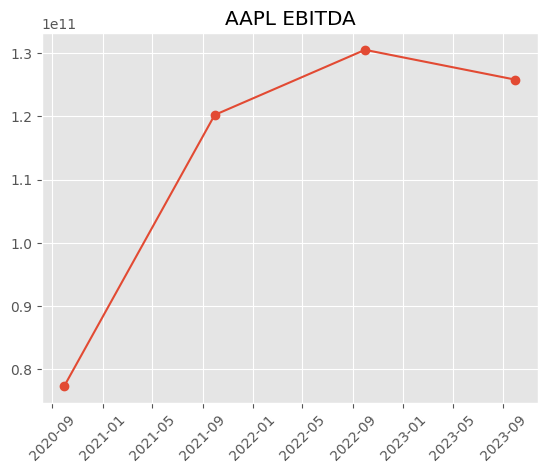

In [15]:
plt.style.use('ggplot')
financials = aapl.get_financials()
plt.plot(financials.loc["EBITDA"].index, financials.loc["EBITDA"].values, marker="o")
plt.xticks(rotation=45)
plt.title(f"{stock} EBITDA");

In [17]:
financials = aapl.get_financials()
revenue = financials.loc["CostOfRevenue":"TotalRevenue"]
revenue = revenue/100000000
revenue =revenue.T
revenue

,CostOfRevenue,TotalRevenue
2023-09-30,2141.37,3832.85
2022-09-30,2235.46,3943.28
2021-09-30,2129.81,3658.17
2020-09-30,1695.59,2745.15


<Figure size 2000x1000 with 0 Axes>

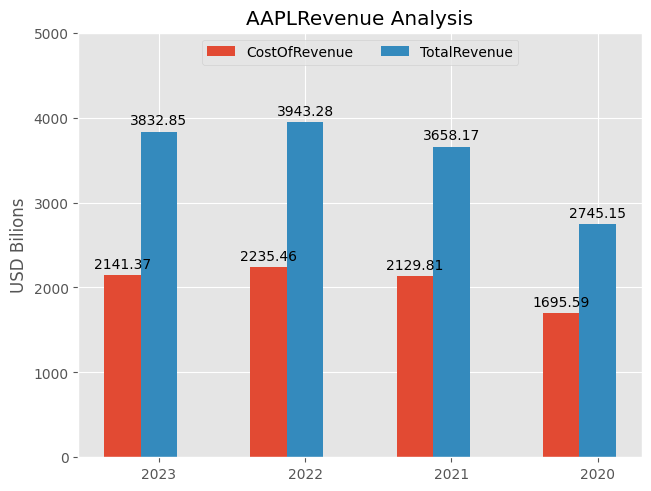

In [19]:
plt.figure(figsize=(20,10))
x_values = [i.year for i in revenue.index]
data = revenue

x=np.arange(len(x_values))
width = 0.25
multipler = 0

fig, ax=plt.subplots(layout='constrained')

for attribute, meansurement in data.items():
    offset = width*multipler
    rects =ax.bar(x+offset,meansurement,width,label=attribute)
    ax.bar_label(rects,padding=3)
    multipler+=1
    
ax.set_ylabel('USD Bilions')
ax.set_title(f'{stock}Revenue Analysis')
ax.set_xticks(x+width,x_values)
ax.legend(revenue.columns,loc=9, ncols=3)
ax.set_ylim(0,5000);

In [20]:
aapl.info['beta']

1.308

In [21]:
aapl.info['earningsGrowth']

0.135

In [25]:
aapl.info['longBusinessSummary']

'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. The company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, and HomePod. It also provides AppleCare support and cloud services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts. In addition, the company offers various services, such as Apple Arcade, a game subscription service; Apple Fitness+, a personalized fitness service; Apple Music, which offers users a curated listening experience with on-demand radio stations; Apple News+, a subscription news and magazine service; Apple TV+, which offers exclusive original content; Apple Card, a co-branded credit card; and Apple P

In [26]:
#MYSTOCKS

In [27]:
mystocks = ['AAPL', 'MSFT', 'IBM']
today = datetime.today()
today

datetime.datetime(2023, 12, 28, 7, 58, 7, 320009)

In [28]:
p_df = yf.download(mystocks, start='2020-01-01', end=today)
p_df.head()

[*********************100%%**********************]  3 of 3 completed


Adj Close                              Close              \
                 AAPL         IBM        MSFT       AAPL         IBM   
Date                                                                   
2020-01-02  73.152657  106.306793  154.779526  75.087502  129.464630   
2020-01-03  72.441460  105.458954  152.852234  74.357498  128.432129   
2020-01-06  73.018684  105.270554  153.247345  74.949997  128.202682   
2020-01-07  72.675278  105.341179  151.850067  74.597504  128.288712   
2020-01-08  73.844345  106.220421  154.268799  75.797501  129.359467   

                             High                                Low  \
                  MSFT       AAPL         IBM        MSFT       AAPL   
Date                                                                   
2020-01-02  160.619995  75.150002  129.942642  160.729996  73.797501   
2020-01-03  158.619995  75.144997  128.929260  159.949997  74.125000   
2020-01-06  159.029999  74.989998  128.336517  159.100006  73.187500   
2020-01-07  157.580002  75.224998  129.024857  159.669998  74.370003   
2020-01-08  160.089996  76.110001  129.885284  160.800003  74.290001   

                                         Open                          \
                   IBM        MSFT       AAPL         IBM        MSFT   
Date                                                                    
2020-01-02  128.843216  158.330002  74.059998  129.063095  158.779999   
2020-01-03  127.686424  158.059998  74.287498  127.695984  158.320007   
2020-01-06  127.342255  156.509995  73.447502  127.552582  157.080002   
2020-01-07  127.533463  157.320007  74.959999  127.810707  159.320007   
2020-01-08  128.030594  157.949997  74.290001  128.594650  158.929993   

               Volume                     
                 AAPL      IBM      MSFT  
Date                                      
2020-01-02  135480400  3293436  22622100  
2020-01-03  146322800  2482890  21116200  
2020-01-06  118387200  2537073  20813700  
2020-01-07  108872000  3232977  21634100  
2020-01-08  132079200  4545916  27746500

In [29]:
p_df = p_df["Adj Close"].copy()
p_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1004 entries, 2020-01-02 to 2023-12-27
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    1004 non-null   float64
 1   IBM     1004 non-null   float64
 2   MSFT    1004 non-null   float64
dtypes: float64(3)
memory usage: 31.4 KB


In [30]:
p_df.index

DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-13',
               '2020-01-14', '2020-01-15',
               ...
               '2023-12-13', '2023-12-14', '2023-12-15', '2023-12-18',
               '2023-12-19', '2023-12-20', '2023-12-21', '2023-12-22',
               '2023-12-26', '2023-12-27'],
              dtype='datetime64[ns]', name='Date', length=1004, freq=None)

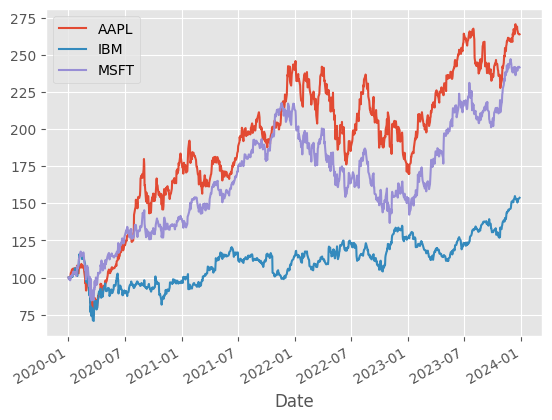

In [31]:
norm_df = p_df/p_df.iloc[0]*100
norm_df.plot();